# 0.0 Imports

In [1]:
import pandas as pd
import seaborn as sns

import plotly.express as px
import requests as r
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as mpatches

import requests

from IPython.core.display    import HTML
from IPython.display         import Image

## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 40
    
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
#     plt.rcParams['axes.titlesize']  = 20
#     plt.rcParams['axes.labelsize']  = 16
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    
    
    
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
jupyter_settings()

# 1.0 Loading data

In [4]:
df = pd.read_csv('../data/data_t2/dataframe_bairros_2.csv')

In [5]:
df.head()

ad_id  latitude  longitude    bairro   cidade                       geometry
0            40560834    -27.09     -48.61    Centro  Itapema     POINT (-48.61215 -27.0914)
1  628340205412932131    -27.12     -48.61  Morretes  Itapema  POINT (-48.610996 -27.115776)
2            39145712    -27.12     -48.61  Morretes  Itapema    POINT (-48.60829 -27.11617)
3            40039627    -27.09     -48.61    Centro  Itapema     POINT (-48.61245 -27.0902)
4            40794806    -27.10     -48.66     Areal  Itapema     POINT (-48.6607 -27.09866)

In [6]:
df['bairro'].unique()

array(['Centro', 'Morretes', 'Areal', 'Cedro', 'Ilhota', 'Rio Pequeno',
       'Meia Praia', 'Estaleirinho', 'Casa Branca', 'Várzea',
       'Alto São Bento', 'Sertãozinho', 'Sertão do Trombudo',
       'Tabuleiro dos Oliveiras', 'Jardim Dourado', 'Alto Perequê',
       'Perequê', 'Vila Nova', 'Canto da Praia', 'Jardim Praiamar'],
      dtype=object)

# 2.0 Shapes

## Estado Santa Catarina

In [7]:
# .shp municipios do estado
sc = gpd.read_file('../data/data_base/base_ibge/SC/SC_Municipios_2020.shp')

In [8]:
type(sc)

geopandas.geodataframe.GeoDataFrame

In [9]:
sc.head()

CD_MUN         NM_MUN SIGLA_UF  AREA_KM2                                           geometry
0  4200051  Abdon Batista       SC    237.52  POLYGON ((-51.03917 -27.50758, -51.03917 -27.5...
1  4200101   Abelardo Luz       SC    953.99  POLYGON ((-52.37869 -26.43962, -52.37790 -26.4...
2  4200200     Agrolândia       SC    206.81  POLYGON ((-49.83288 -27.34884, -49.83261 -27.3...
3  4200309     Agronômica       SC    129.77  POLYGON ((-49.69336 -27.24585, -49.69379 -27.2...
4  4200408      Água Doce       SC   1319.14  POLYGON ((-51.63844 -26.58132, -51.63658 -26.5...

### Shapes files municípios estado SC

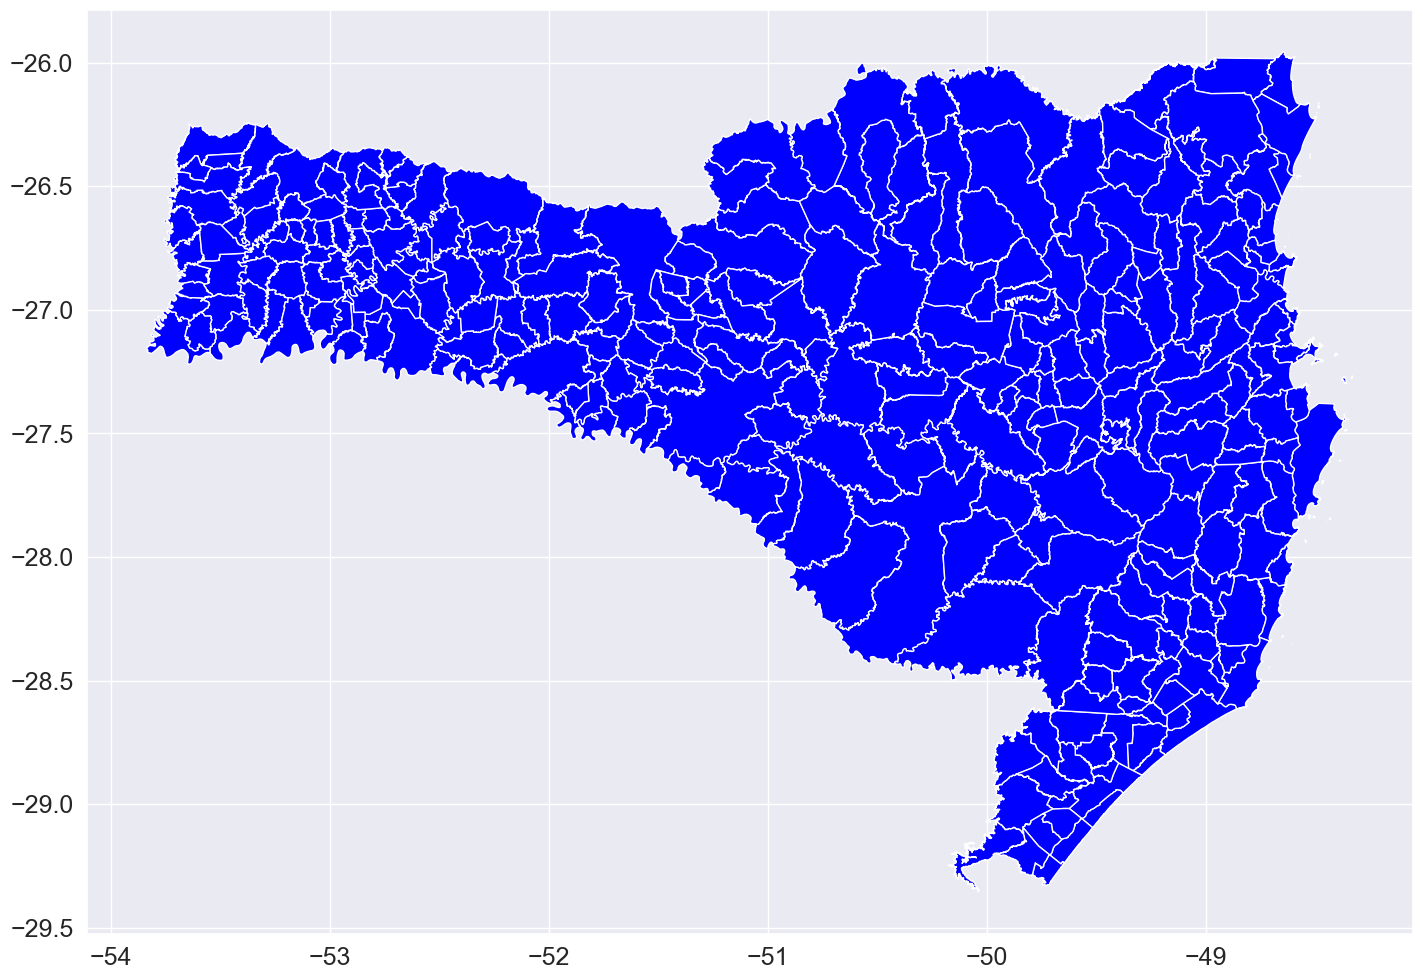

In [10]:
sc.plot();

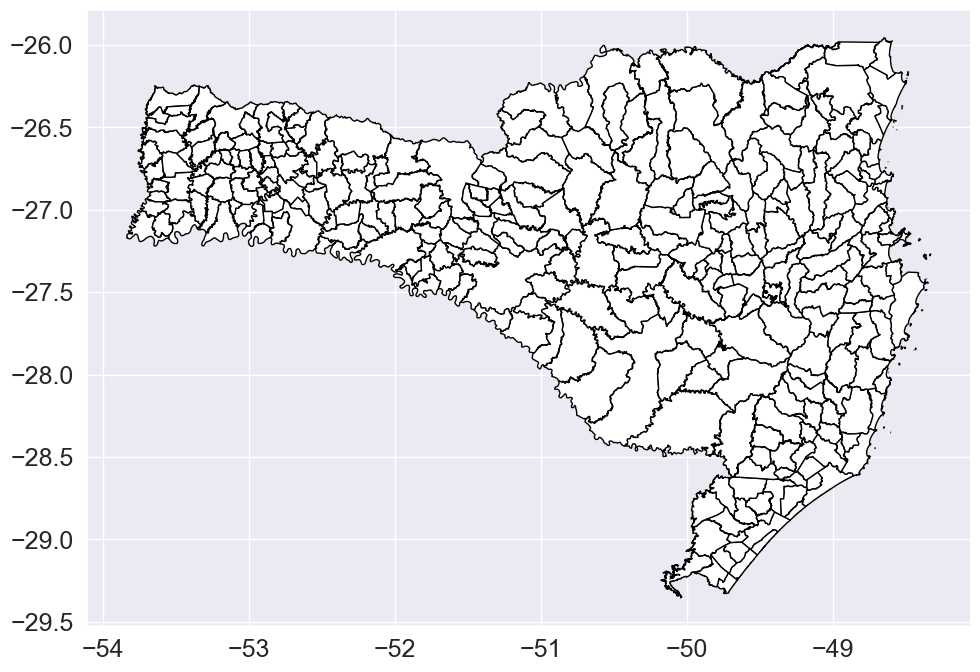

In [11]:
sc.plot(color='white', edgecolor='black', figsize=(15,8));

## Municipios Itapema - Porto Belo - Balneario Camburiú

In [12]:
itapema   = gpd.read_file('../data/data_t2/shapes/municipios/itapema.shp')
porto     = gpd.read_file('../data/data_t2/shapes/municipios/porto_belo.shp')
balneario = gpd.read_file('../data/data_t2/shapes/municipios/balneario.shp')
camboriu  = gpd.read_file('../data/data_t2/shapes/municipios/camboriu.shp')
geo_dados = gpd.read_file('../data/data_t2/shapes/SC-DATASET/DATASET.shp')

In [13]:
# mudando crs
#crs = {'init': 'epsg:4326'}

In [14]:
# itapema.to_crs(crs, inplace = True)   
# porto.to_crs(crs, inplace = True)        
# balneario.to_crs(crs, inplace = True)  
# camboriu.to_crs(crs, inplace = True) 
# geo_dados.to_crs(crs, inplace = True)   

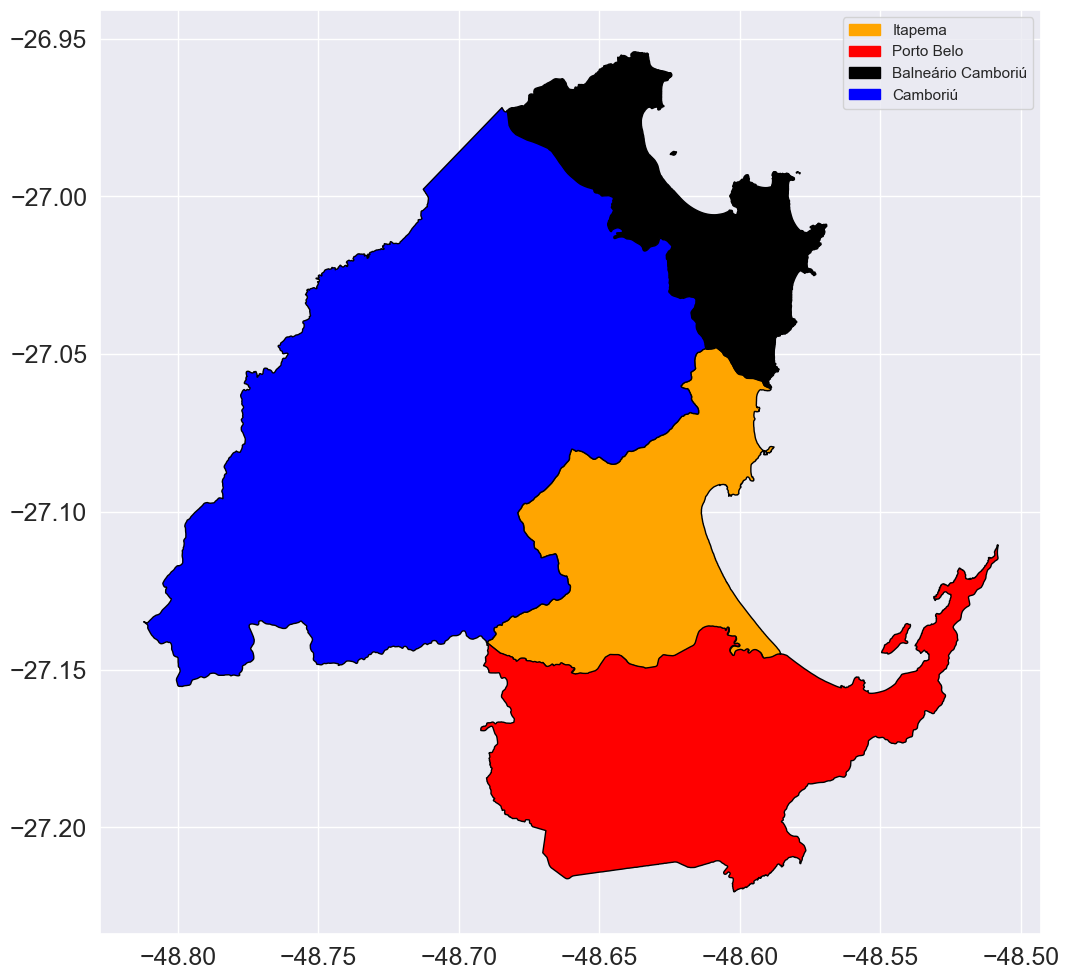

In [15]:
fig = plt.figure( figsize = (24,12) )
specs = gridspec.GridSpec( ncols = 1, nrows = 1, figure = fig )
ax1 = fig.add_subplot( specs[ 0,0] )

#itapema
itapema.plot(color='orange', edgecolor='black', figsize = (15, 8), ax = ax1,label = 'Itapema');
itapema_patch   = mpatches.Patch(color='orange', label='Itapema')

# porto belo
porto.plot(color='red', edgecolor='black', figsize = (15, 8), ax = ax1, label = 'Porto_Belo');
porto_patch     = mpatches.Patch(color='red', label='Porto Belo')

# balneario camboriu
balneario.plot(color='black',  edgecolor='black', figsize = (15, 8), ax = ax1,label = 'Balneario_Camboriu');
balneario_patch = mpatches.Patch(color='black', label='Balneário Camboriú')

# camboriu
camboriu.plot(color='blue',  edgecolor='black', figsize = (15, 8), ax = ax1,label = 'Camboriu');
camboriu_patch  = mpatches.Patch(color='blue', label='Camboriú')

ax1.legend(handles=[itapema_patch, porto_patch, balneario_patch, camboriu_patch]);

## centro do mapa no openstreetmap

In [16]:
# coordenada y
y = itapema.centroid.y.iloc[0]
y

/tmp/ipykernel_35187/4177289118.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = itapema.centroid.y.iloc[0]


-27.108583349213188

In [17]:
# coordenada x
x = itapema.centroid.x.iloc[0]
x

/tmp/ipykernel_35187/235850319.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = itapema.centroid.x.iloc[0]


-48.6344269527891

## Mapa simples geo_json

In [18]:
base = folium.Map(location=[y,x], zoom_start = 11, tiles = 'OpenStreetMap')
geojson_itapema   = folium.GeoJson(itapema)
geojson_porto     = folium.GeoJson(porto)
geojson_balneario = folium.GeoJson(balneario)
geojson_camboriu  = folium.GeoJson(camboriu)
#mostra popup com variavel 'NM_MUN' do shape de itapema
#geojson_itapema.add_child(folium.Popup(itapema.NM_MUN.iloc[0]))
geojson_itapema.add_child(folium.Popup(itapema['NM_MUN'].iloc[0]))
geojson_porto.add_child(folium.Popup(porto['NM_MUN'].iloc[0]))
geojson_balneario.add_child(folium.Popup(balneario['NM_MUN'].iloc[0]))
geojson_camboriu.add_child(folium.Popup(camboriu['NM_MUN'].iloc[0]))
#adiciona camada a base
geojson_itapema.add_to(base)
geojson_porto.add_to(base)
geojson_balneario.add_to(base)
geojson_camboriu.add_to(base)


# adicionar objeto
cluster = MarkerCluster()

for item in geo_dados.itertuples():
    # adicionar ao cluster os filhos
    cluster.add_child(folium.Marker( location=[item.latitude, item.longitude],
                                    popup="<h4>"+str(item.bairro)+"</h4> <h5>"+str(item.cidade)+"</h5> <p>Setor "+str(item.ad_id)+"</p>",
                                    icon=folium.Icon(color='red',
                                                     prefix='fa', 
                                                     icon='fas fa-home')
                                   )
                     )

# adiciona o filho a base    
base.add_child(cluster)

folium.LayerControl().add_to(base)

base

# Exploratory Data Analysis

In [19]:
df.head()

ad_id  latitude  longitude    bairro   cidade                       geometry
0            40560834    -27.09     -48.61    Centro  Itapema     POINT (-48.61215 -27.0914)
1  628340205412932131    -27.12     -48.61  Morretes  Itapema  POINT (-48.610996 -27.115776)
2            39145712    -27.12     -48.61  Morretes  Itapema    POINT (-48.60829 -27.11617)
3            40039627    -27.09     -48.61    Centro  Itapema     POINT (-48.61245 -27.0902)
4            40794806    -27.10     -48.66     Areal  Itapema     POINT (-48.6607 -27.09866)

In [20]:
# imoveis por cidade e quantidade de bairros
aux1 = (df[['cidade', 'bairro', 'ad_id']].groupby(['cidade'])
                                        .agg(qtd_imoveis = ('ad_id', 'nunique'),
                                             qtd_bairros = ('bairro', 'nunique')).reset_index() )
aux1

cidade  qtd_imoveis  qtd_bairros
0  Balneário Camboriú           18            1
1            Camboriú            2            2
2             Itapema         2038           13
3          Porto Belo          253            4

In [21]:
# Quantidade imoveis por bairro
aux1 = (df[['cidade', 'bairro', 'ad_id']].groupby(['cidade', 'bairro'])
                                        .agg(qtd_imoveis = ('ad_id', 'nunique')).reset_index() )
aux1

cidade                   bairro  qtd_imoveis
0   Balneário Camboriú             Estaleirinho           18
1             Camboriú                    Cedro            1
2             Camboriú              Rio Pequeno            1
3              Itapema           Alto São Bento           41
4              Itapema                    Areal            4
5              Itapema           Canto da Praia           16
6              Itapema              Casa Branca           47
7              Itapema                   Centro          292
8              Itapema                   Ilhota           31
9              Itapema          Jardim Praiamar           10
10             Itapema               Meia Praia         1349
11             Itapema                 Morretes          175
12             Itapema       Sertão do Trombudo            3
13             Itapema              Sertãozinho            9
14             Itapema  Tabuleiro dos Oliveiras           42
15             Itapema                   Várzea           19
16          Porto Belo             Alto Perequê           13
17          Porto Belo           Jardim Dourado           58
18          Porto Belo                  Perequê          155
19          Porto Belo                Vila Nova           27

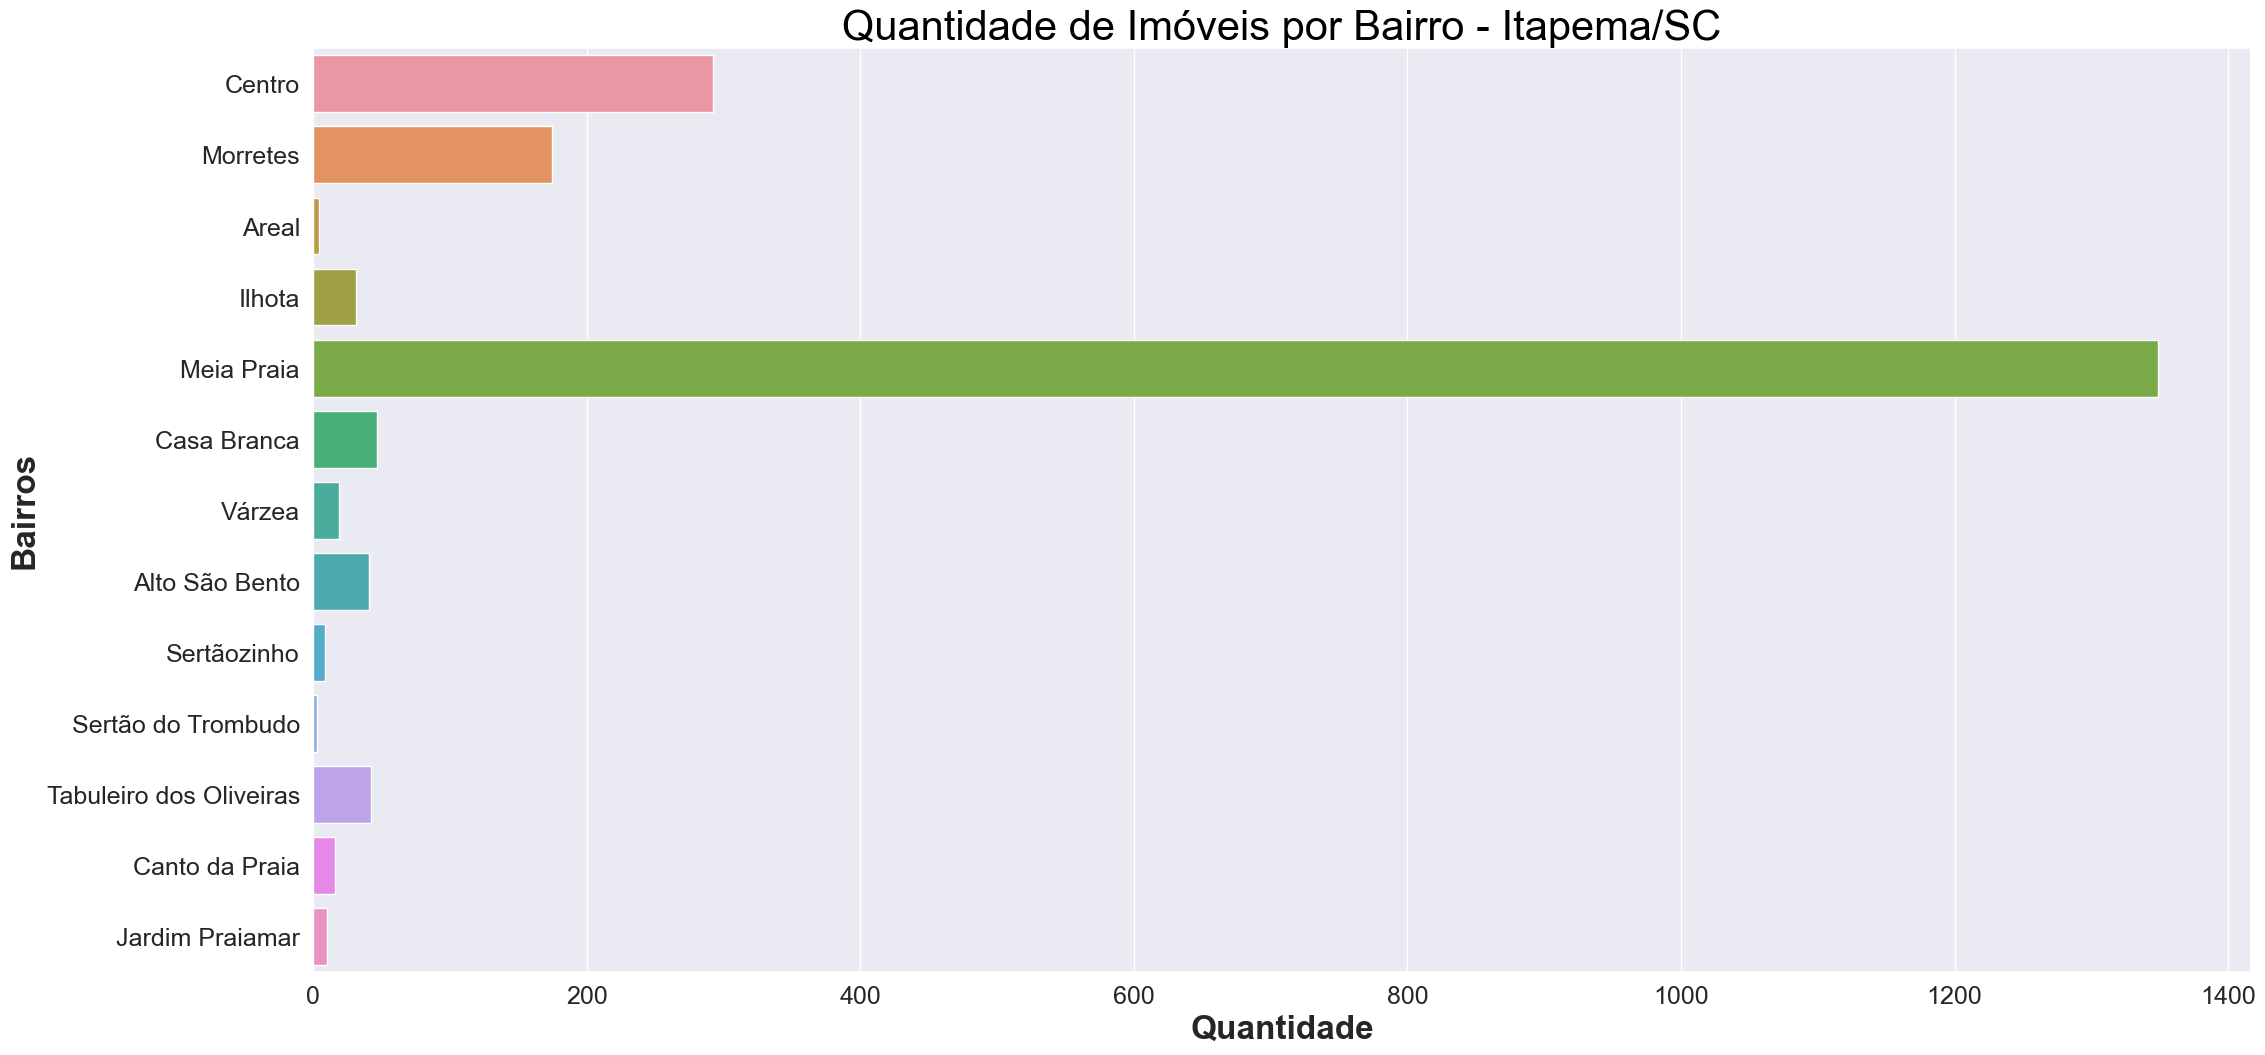

In [22]:
aux2 = df.loc[df['cidade'] == 'Itapema'].copy()
sns.countplot(data = aux2, y = 'bairro');
fontdict={'fontsize': 30,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Quantidade', fontsize=24, fontweight='bold')
plt.ylabel('Bairros', fontsize=24, fontweight='bold')
plt.title('Quantidade de Imóveis por Bairro - Itapema/SC', fontdict=fontdict, color="black", position=(0.5,1));

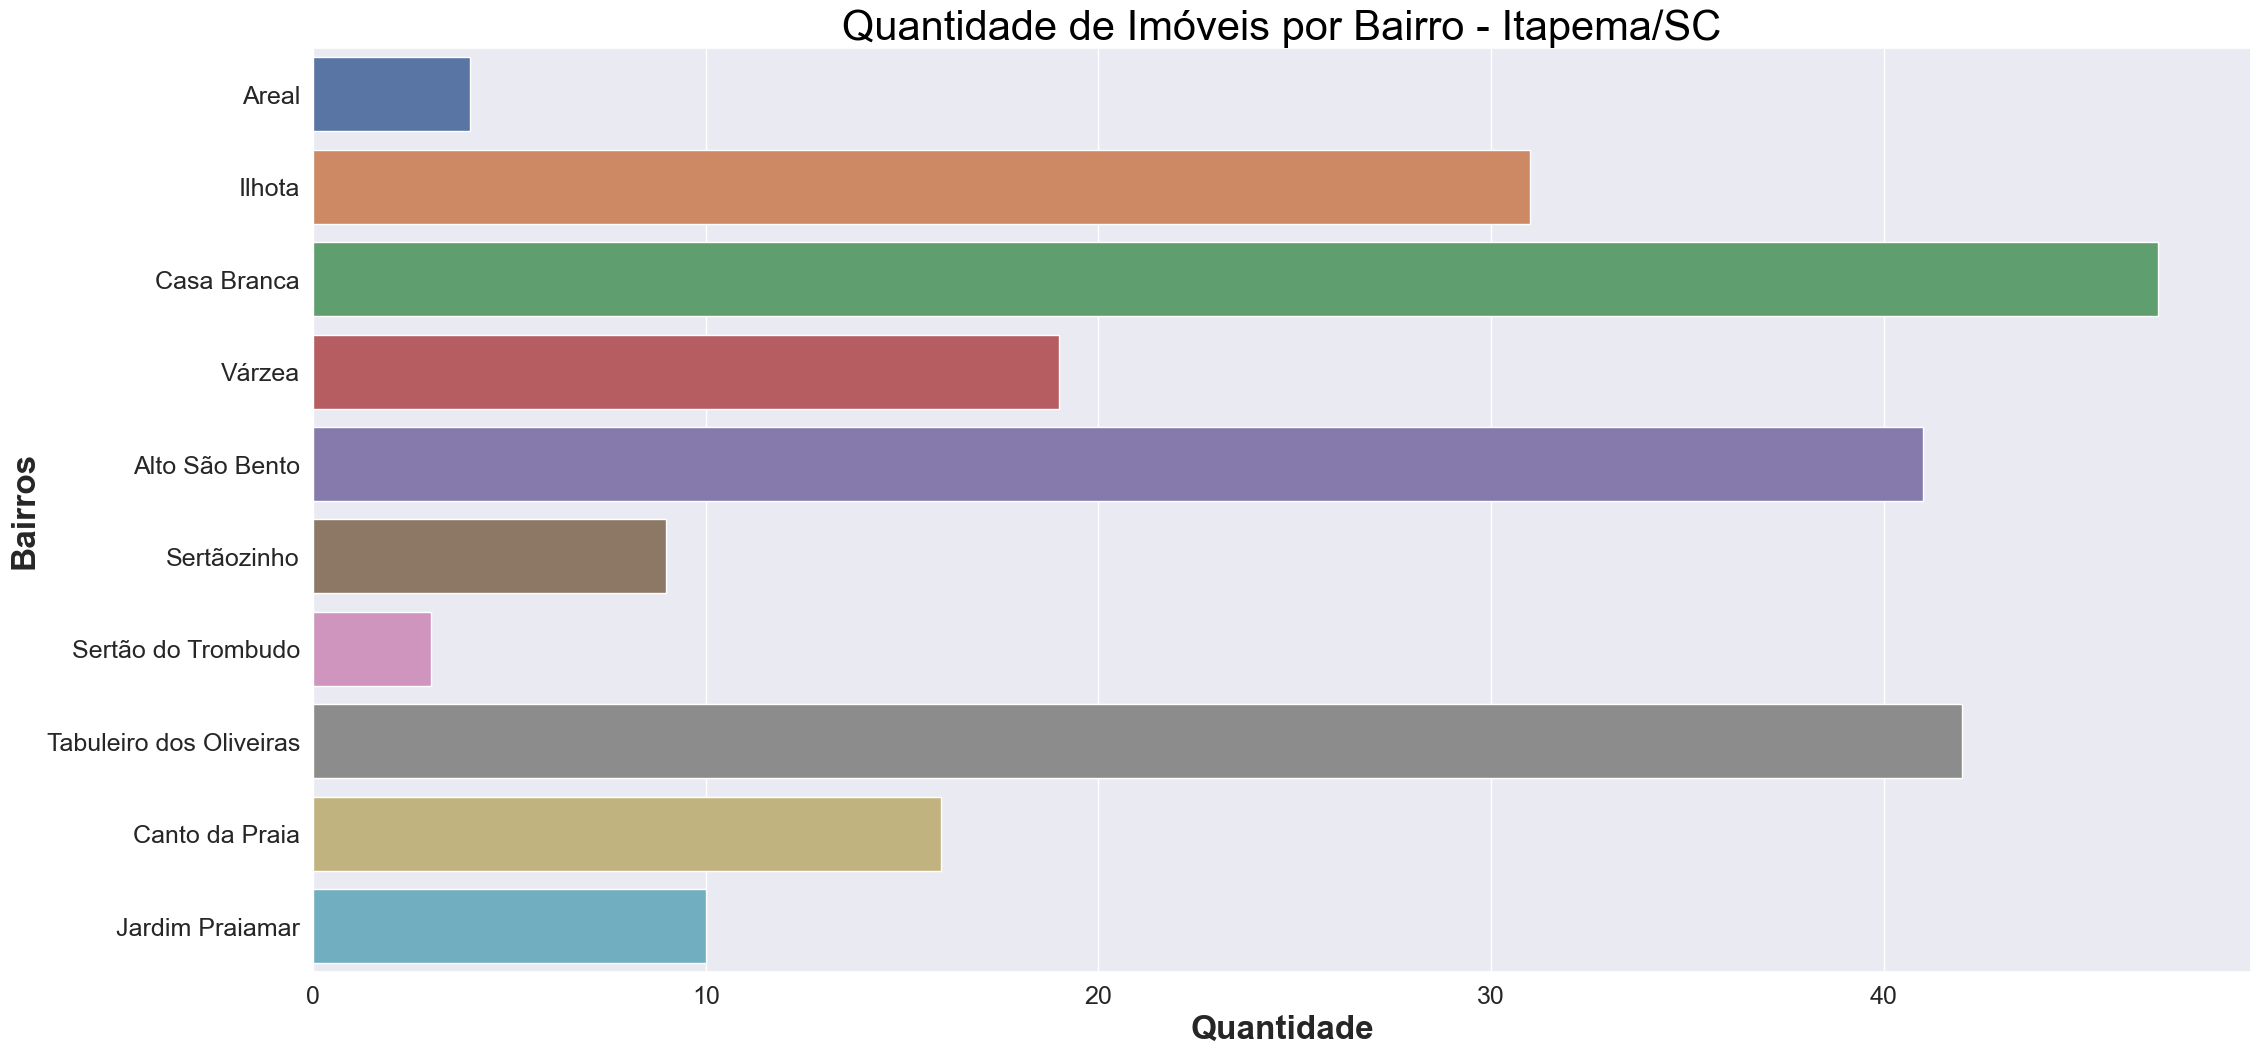

In [23]:
aux2 = (df.loc[(df['cidade'] == 'Itapema') & ~( (df['bairro'] == 'Meia Praia') | (df['bairro'] == 'Morretes')| 
                                               (df['bairro'] == 'Centro') )]).copy() 
sns.countplot(data = aux2, y = 'bairro');
fontdict={'fontsize': 30,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Quantidade', fontsize=24, fontweight='bold')
plt.ylabel('Bairros', fontsize=24, fontweight='bold')
plt.title('Quantidade de Imóveis por Bairro - Itapema/SC', fontdict=fontdict, color="black", position=(0.5,1));

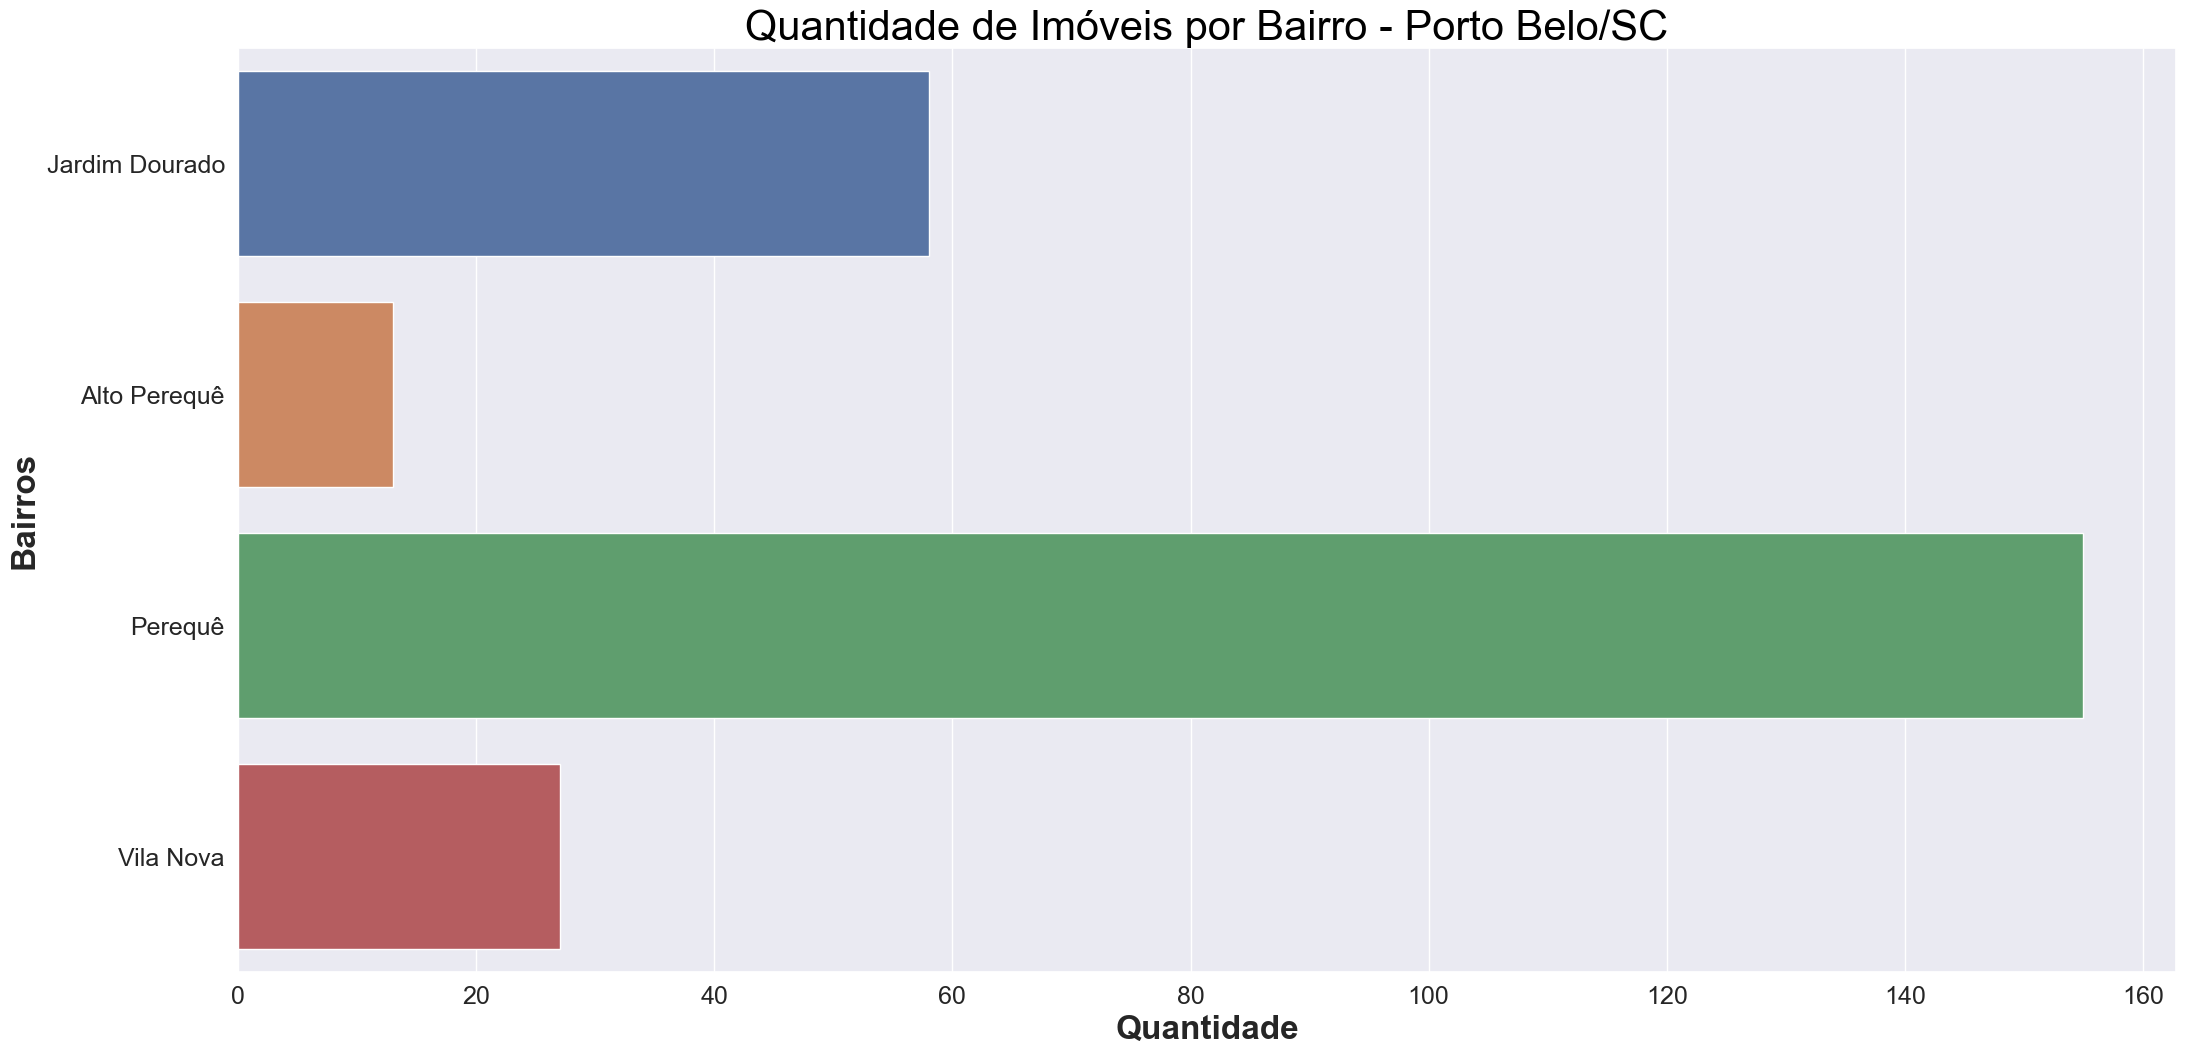

In [24]:
aux2 = df.loc[df['cidade'] == 'Porto Belo'].copy()
sns.countplot(data = aux2, y = 'bairro');
fontdict={'fontsize': 30,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Quantidade', fontsize=24, fontweight='bold')
plt.ylabel('Bairros', fontsize=24, fontweight='bold')
plt.title('Quantidade de Imóveis por Bairro - Porto Belo/SC', fontdict=fontdict, color="black", position=(0.5,1));

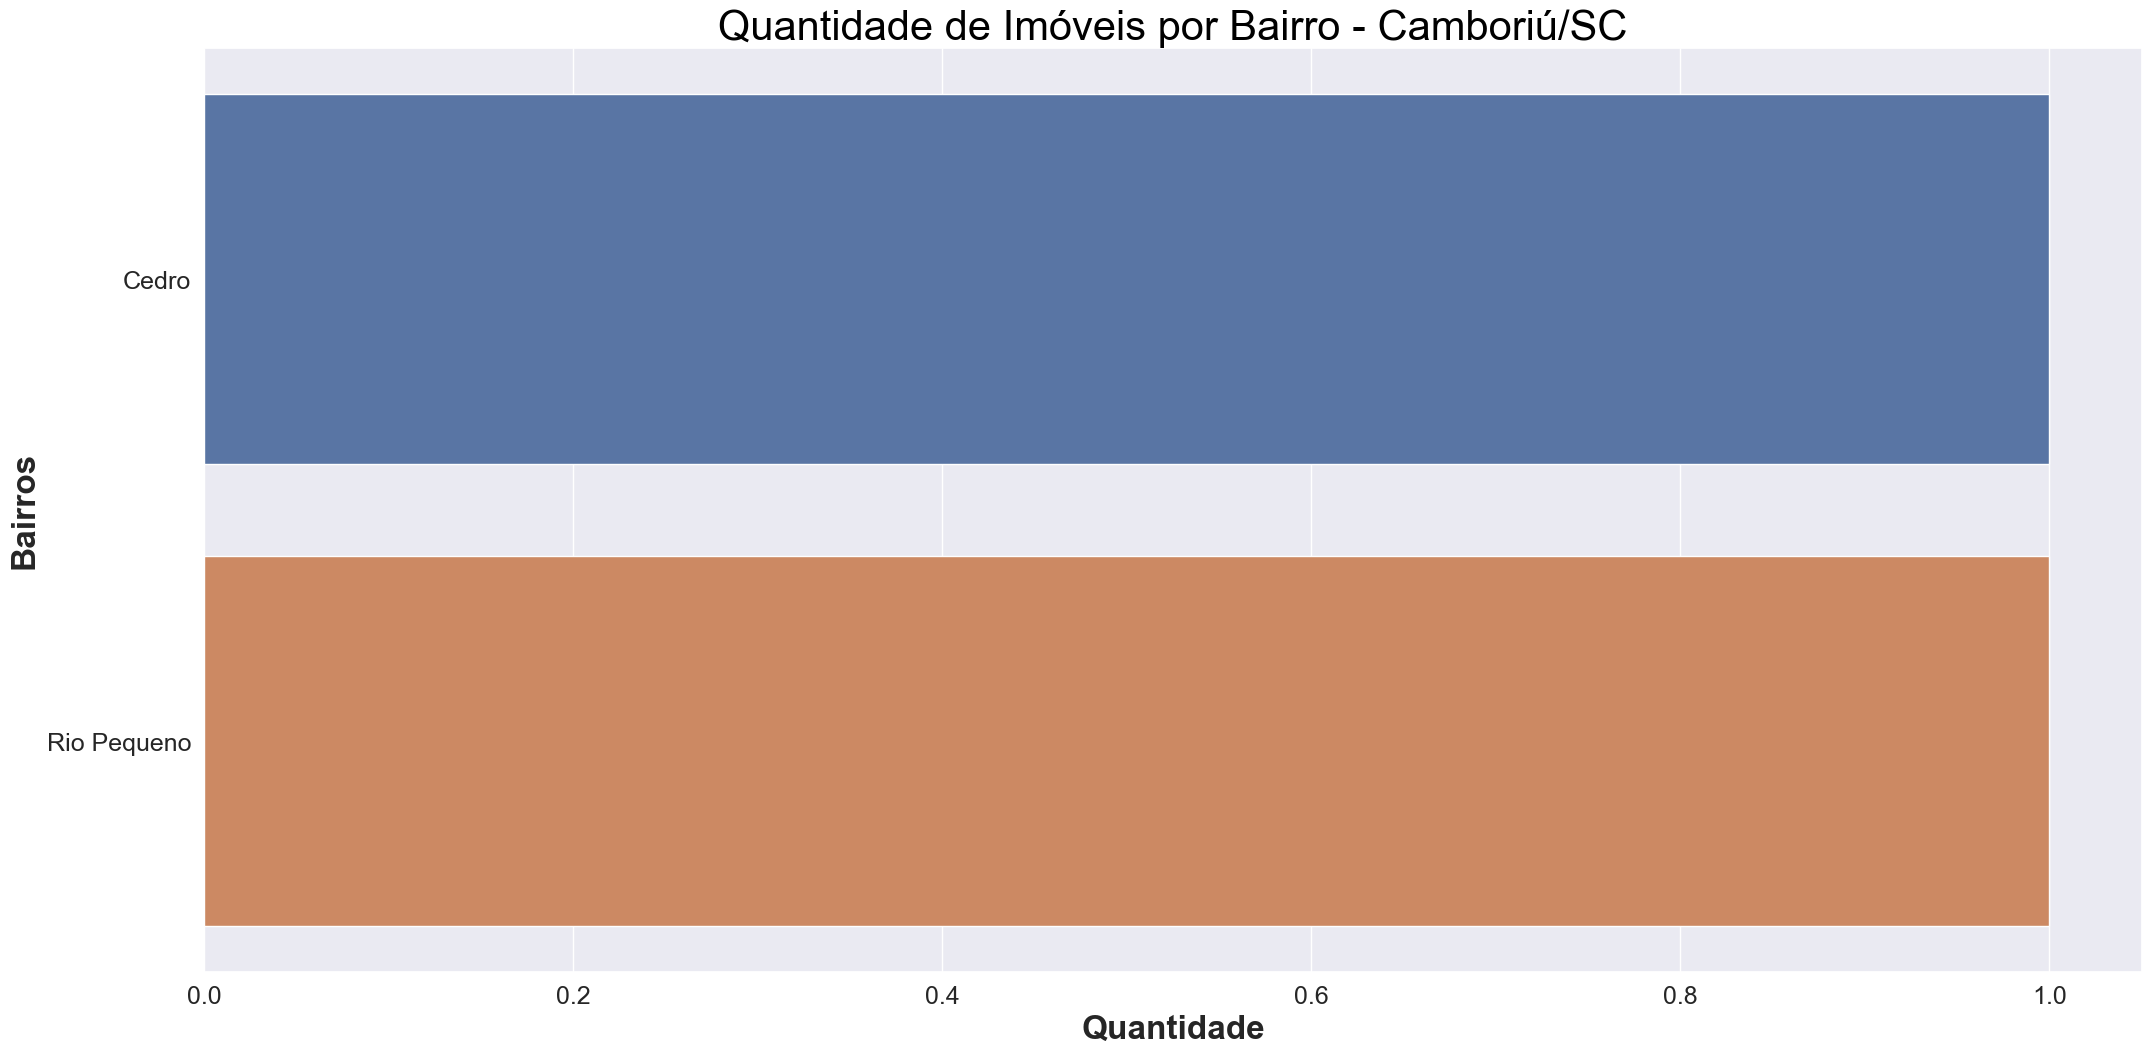

In [25]:
aux2 = df.loc[df['cidade'] == 'Camboriú'].copy()
sns.countplot(data = aux2, y = 'bairro');
fontdict={'fontsize': 30,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Quantidade', fontsize=24, fontweight='bold')
plt.ylabel('Bairros', fontsize=24, fontweight='bold')
plt.title('Quantidade de Imóveis por Bairro - Camboriú/SC', fontdict=fontdict, color="black", position=(0.5,1));

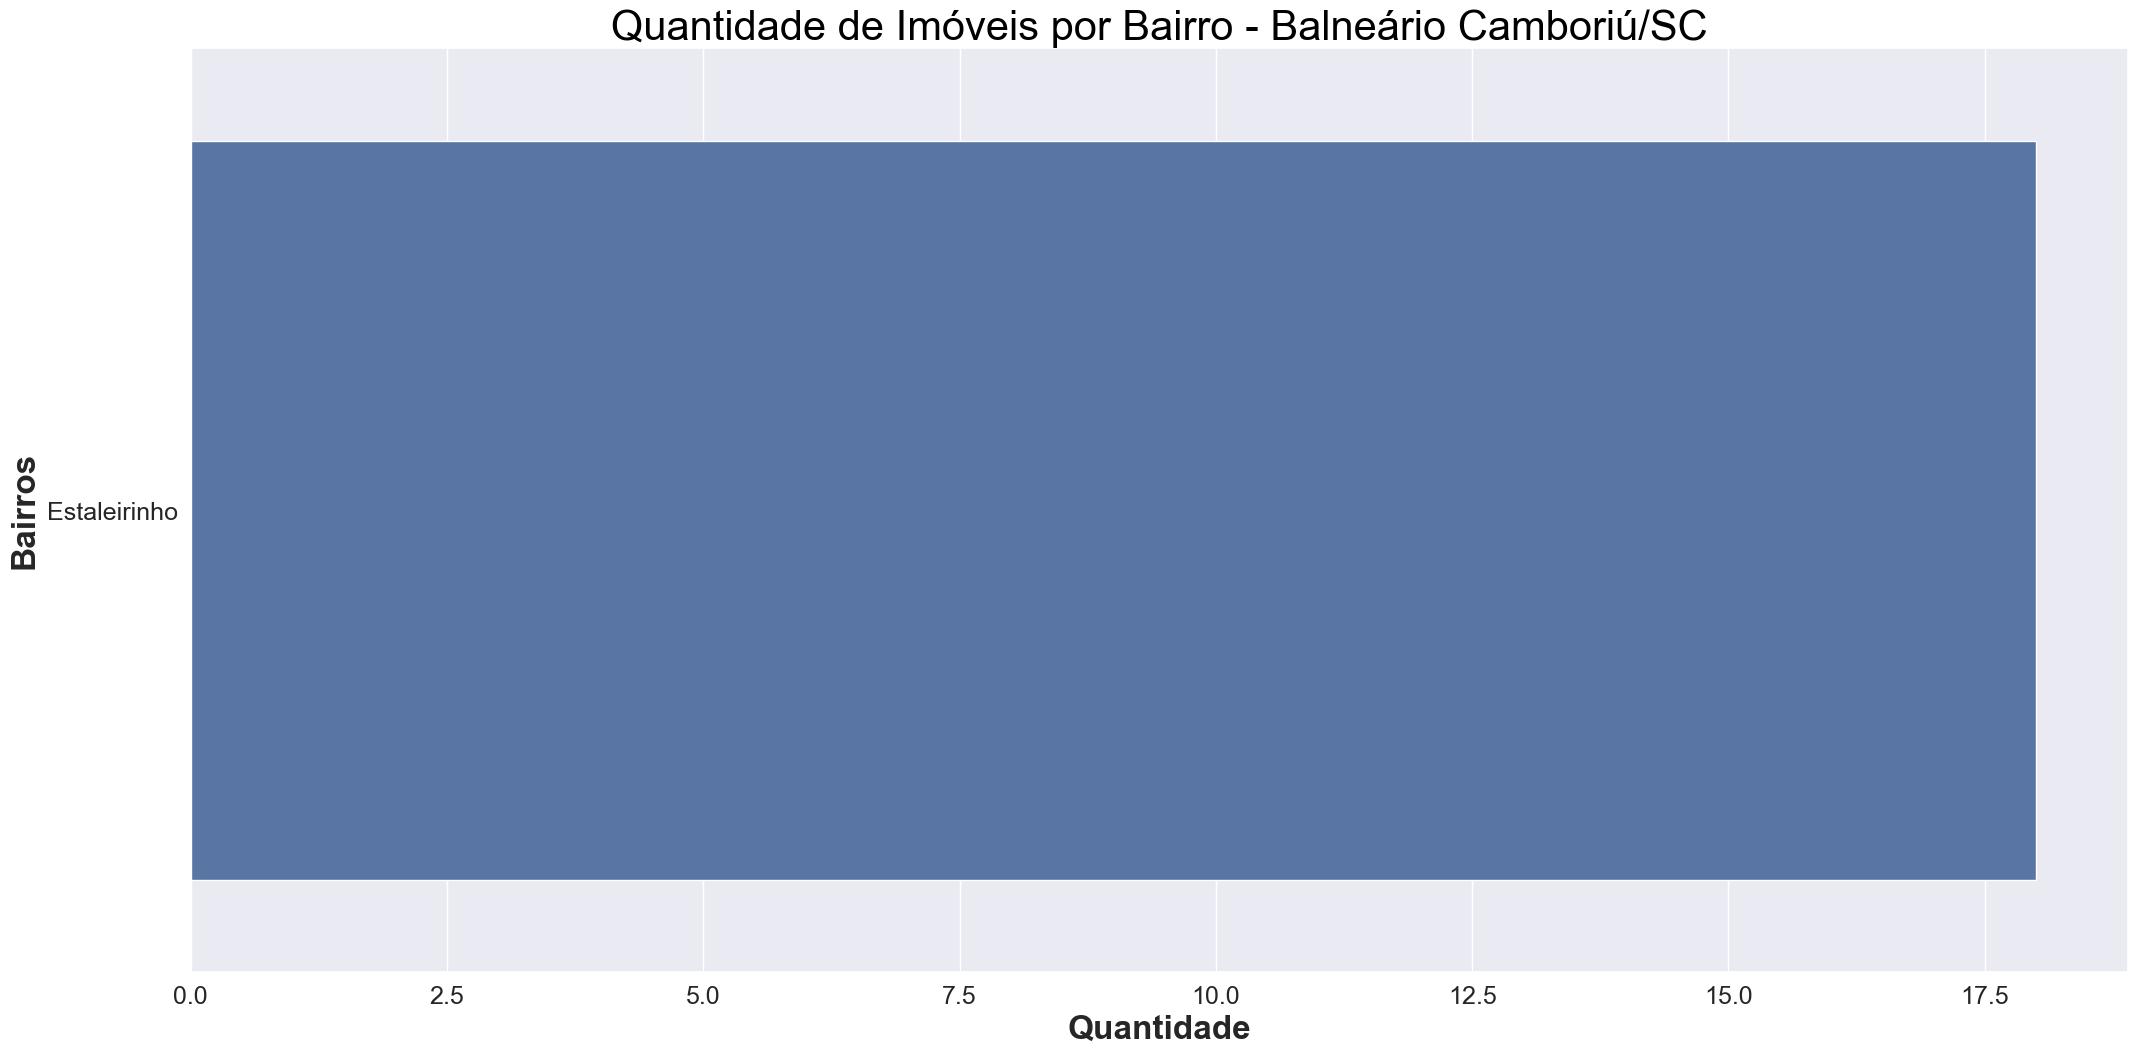

In [26]:
aux2 = df.loc[df['cidade'] == 'Balneário Camboriú'].copy()
sns.countplot(data = aux2, y = 'bairro');
fontdict={'fontsize': 30,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Quantidade', fontsize=24, fontweight='bold')
plt.ylabel('Bairros', fontsize=24, fontweight='bold')
plt.title('Quantidade de Imóveis por Bairro - Balneário Camboriú/SC', fontdict=fontdict, color="black", position=(0.5,1));

## Heatmap

In [27]:
# heatmap precisa de uma lista com latitude longitude e um peso
# criando o peso
aux1 = geo_dados[['ad_id','bairro']].groupby('bairro').count().reset_index()

aux2 = aux1['ad_id'].max()
aux1['peso'] = aux1['ad_id'].apply(lambda x: x / aux2 )

aux1= aux1.drop('ad_id', axis=1)

aux1 = aux1.to_dict('list')

aux2 = geo_dados['bairro'].value_counts(normalize = True)
aux2 = aux2.to_dict()

aux3 = geo_dados.copy()
aux3['contagem'] = aux3['bairro'].map(aux2)
aux3.head()

ad_id  latitude  longitude    bairro   cidade                     geometry  contagem
0            40560834    -27.09     -48.61    Centro  Itapema  POINT (-48.61215 -27.09140)      0.13
1  628340205412932131    -27.12     -48.61  Morretes  Itapema  POINT (-48.61100 -27.11578)      0.08
2            39145712    -27.12     -48.61  Morretes  Itapema  POINT (-48.60829 -27.11617)      0.08
3            40039627    -27.09     -48.61    Centro  Itapema  POINT (-48.61245 -27.09020)      0.13
4            40794806    -27.10     -48.66     Areal  Itapema  POINT (-48.66070 -27.09866)      0.00

In [28]:
# heatmap precisa de uma lista com latitude longitude e um peso
data = []
for i in range(len(aux3)):
    data.append([aux3['geometry'][i].centroid.y,
                 aux3['geometry'][i].centroid.x,
                 aux3['contagem'][i]])

In [29]:
data[0:5]

[[-27.0914, -48.61215, 0.12635222847252273],
 [-27.115776, -48.610996, 0.07572479446127217],
 [-27.11617, -48.60829, 0.07572479446127217],
 [-27.0902, -48.61245, 0.12635222847252273],
 [-27.09866, -48.6607, 0.0017308524448290783]]

In [30]:
# heatmap precisa de uma lista com latitude longitude e um peso
base = folium.Map([y, x], zoom_start=11, tiles='OpenStreetMap')

HeatMap(data, name="Imoveis").add_to(base)

folium.LayerControl().add_to(base)

#base.save('HeatMap.html')

base